In [9]:
import os, glob
import scanpy as sc

In [ ]:
name = 'rRNAModifications'
unzip_dir = os.path.join('..', '..', 'data', 'unzip', name)
fn = glob.glob(os.path.join(unzip_dir, 'mcran*.h5ad'))[0]
adata = sc.read_h5ad(fn)

In [11]:
adata

AnnData object with n_obs × n_vars = 3421 × 17810
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'sample', 'RNA_snn_res.0.5', 'ident', 'celltype', 'velocity_self_transition'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_genes'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'logcounts', 'scaled'
    obsp: 'connectivities', 'distances'

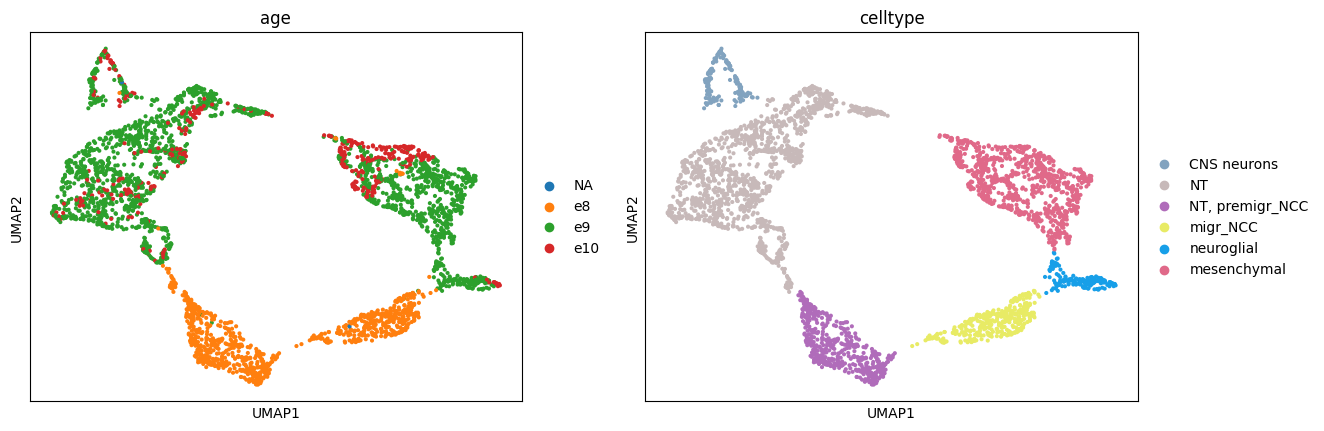

In [12]:
sc.pl.umap(adata, color = ['age', 'celltype'])

In [13]:
celltype_dict = {
    'CNS neurons'     : 'CNS Neurons',
    'NT'              : 'Neural Tube',
    'NT, premigr_NCC' : 'Premigratory Neural Crest',
    'migr_NCC'        : 'Migratory Neural Crest',
    'neuroglial'      : 'Neuroglial Progenitors',
    'mesenchymal'     : 'Cranial Mesenchyme'
    }

adata.obs['celltype_original'] = adata.obs.celltype.copy()
adata.obs['celltype'] = adata.obs.celltype.map(celltype_dict).astype('category')

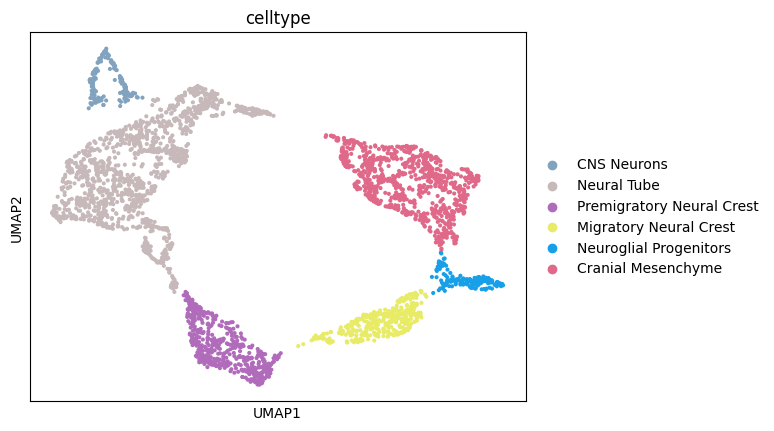

In [14]:
sc.pl.umap(adata, color = 'celltype')

In [ ]:
outdir = os.path.join('..', '..', 'data', 'processed')
adata.write(os.path.join(outdir, f'{name}.h5ad'))